In [1]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


���� �̸�, ���͸� �̸� �Ǵ� ���� ���̺� ������ �߸��Ǿ����ϴ�.


Note: you may need to restart the kernel to use updated packages.


���� �̸�, ���͸� �̸� �Ǵ� ���� ���̺� ������ �߸��Ǿ����ϴ�.


# Lab 1 : 비용함수 (Cost Function)
## Lab goal : Linear regression in one variable의 Cost function을 구현

## Tools : numpy, matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1.3 문제 정의 (Problem Statement)

Predict house price with given house size.

- 1000 평방피트(sqft) 크기의 집이 \$300,000 에 팔렸다
- 2000 평방피트 크기의 집이 \$500,000 에 팔렸다.

| 크기 (1000 sqft) | 가격 (1000s of dollars) |
| :--------------: | :-----------------------: |
|       1.0        |           300.0           |
|       2.0        |           500.0           |

In [6]:
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])

print(f"x_train = {x_train}")
print(f"y_train = {y_train}")
print(x_train.shape)

x_train = [1. 2.]
y_train = [300. 500.]
(2,)


## 1.4 비용 계산하기 (Computing Cost)

'비용(Cost)'이라는 용어는 모델이 예측한 값과 실제 값의 차이를 나타내는 척도. 즉, **모델이 얼마나 틀렸는지를 나타내는 숫자**라고 할 수 있다. 비용이 낮을수록 모델의 예측이 더 정확하다는 뜻.

단변수 선형 회귀에서 비용 함수 $J(w,b)$는 다음과 같이 정의된다.

$$ J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \quad \quad (1) $$

이때, 모델의 예측 함수 $f_{w,b}(x)$는 직선 방정식과 같다.

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \quad \quad (2) $$

* $f_{w,b}(x^{(i)})$ : 파라미터 $w$와 $b$로 정해진 모델이 $i$번째 훈련 데이터 $x^{(i)}$에 대해 예측한 값.
* $(f_{w,b}(x^{(i)}) - y^{(i)})^2$ : $i$번째 데이터에 대한 **예측값과 실제값의 차이를 제곱**한 것입니다. 이를 '오차의 제곱(squared error)'이라고 부른다.
* $\sum_{i=0}^{m-1}$ : 모든 훈련 데이터($m$개)에 대해 오차의 제곱을 전부 더하라는 의미. 
* $\frac{1}{2m}$ : 오차 제곱의 합을 훈련 데이터 개수($m$)로 나누어 **평균 오차**를 구한다. 2로 한 번 더 나누는 것은 나중에 경사 하강법에서 미분 계산을 편하게 하기 위한 수학적 트릭. 

In [42]:
def compute_costJ(x,y,w,b):
    """선형 회귀의 Cost function J를 계산
    
    Keyword arguments:
    x : feature(특성 = 집 크기), m은 feature 데이터 개수
    y : target data(집 가격)
    스칼라값들 = w : weight, b : bias
    Return: J
    """
    m = x.shape[0]
    cost_sum = 0

    for i in range(m):
        f_wb = w*x[i] + b # i번째 데이터에 대한 모델의 예측
        cost = (f_wb - y[i]) **2
        cost_sum += cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost
    

## 1.5 비용 함수에 대한 직관 (Cost Function Intuition)

우리의 최종 목표는 비용($J(w,b)$)을 최소로 만드는 파라미터 $w$와 $b$를 찾는 것이다. 그렇게 찾은 $w, b$로 만든 예측 모델 $f_{w,b}(x) = wx+b$가 훈련 데이터를 가장 잘 설명한다고 말할 수 있기 때문.

일단 문제를 단순화하기 위해, 이전 실습에서 최적의 값으로 알려진 $b=100$으로 값을 고정하고, $w$ 값만 바꿔보면서 비용이 어떻게 변하는지 관찰하자.

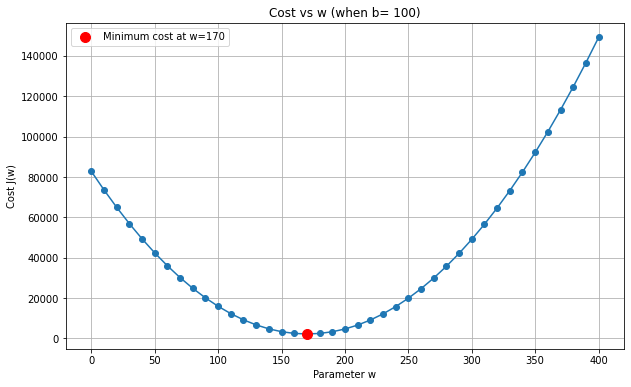

In [43]:
# b=100 고정, w를 0에서 400까지 바꿔가며 cost 계산

b_fixed = 100
w_range = np.arange(0,401,10) # [0,10,20, ... , 390,400]
costs = []

for w_val in w_range:
    cost = compute_costJ(x_train,y_train,w_val,b_fixed)
    costs.append(cost)

# matplotlib를 이용, 다양한 w값에 따른 cost그래프
plt.figure(figsize = (10,6))
plt.plot(w_range, costs, marker='o',linestyle='-')
plt.title(f"Cost vs w (when b= {b_fixed})")
plt.xlabel("Parameter w")
plt.ylabel("Cost J(w)")
plt.grid(True)

min_cost_index = np.argmin(costs) # cost 중 최솟값 찾기
min_w = w_range[min_cost_index]
min_cost = costs[min_cost_index]
plt.scatter(min_w,min_cost,color='red',zorder=3,s=100,label=f'Minimum cost at w={min_w}')
plt.legend()

plt.show()




### 그래프 분석

위 그래프는 몇 가지 중요한 점을 보여준다.
 
**비용 최소화 지점** : $w=200$일 때, cost가 최소가 된다.

**완벽한 예측** : 이렇게 찾은 최적인 parameter인 $w=200, b=100$을 사용한 예측직선 $f(x) = 200x + 100$ 은 위의 훈련데이터를 완벽히 지나가는 직선을 긋게 된다

## 1.6 Cost function Visualization - 3D

### 1.6.1 Larger dataset
이전의 예시는 일직선상에 분포된 데이터였다. 실제 세상에서의 데이터는 이렇게 아름답게 일직선 상에 놓여있지 않는다. 이번엔 하나의 직선위로 표현할 수 없는 더 많은 데이터 셋을 살펴보자. 

**이 경우 cost가 0이 되는 $w,b$가 존재하는가? 없다면 최소화하는 $w,b$를 찾을 수 있는가?**

In [44]:
# new dataset
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730]) 

### 3D 표면도와 동고선도

이번엔 $w,b$ 두 개의 파라미터가 변하기에, Cost function $J(w,b)$ 는 3차원 상의 표면으로 시각화해야 한다. 
이를 위해 contour plot을 사용한다. 

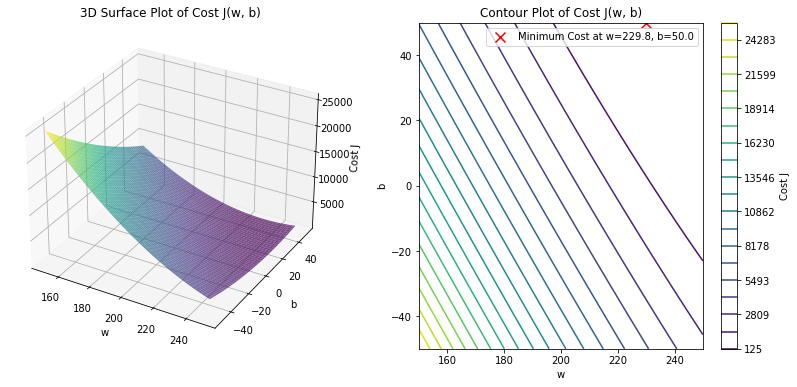

In [52]:
from mpl_toolkits.mplot3d import Axes3D

# w와 b의 범위를 설정합니다.
w_range = np.linspace(150, 250, 100) # 150~250 사이를 100개로 나눔
b_range = np.linspace(-50, 50, 100)  # -50~50 사이를 100개로 나눔

# w와 b의 모든 조합을 만듭니다(격자 생성).
W, B = np.meshgrid(w_range, b_range)
costs = np.zeros(W.shape)

# 각 (w, b) 조합에 대해 비용을 계산합니다.
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        w_ij = W[i, j]
        b_ij = B[i, j]
        costs[i, j] = compute_costJ(x_train, y_train, w_ij, b_ij)

# 3D 표면도와 등고선도를 그립니다.
fig = plt.figure(figsize=(14, 6))

# 3D 표면도 (Surface Plot)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(W, B, costs, cmap='viridis', alpha=0.7)
ax1.set_title("3D Surface Plot of Cost J(w, b)")
ax1.set_xlabel("w")
ax1.set_ylabel("b")
ax1.set_zlabel("Cost J")

# 등고선도 (Contour Plot)
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(W, B, costs, levels=np.linspace(costs.min(), costs.max(), 20), cmap='viridis')
fig.colorbar(contour, ax=ax2, label='Cost J')
ax2.set_title("Contour Plot of Cost J(w, b)")
ax2.set_xlabel("w")
ax2.set_ylabel("b")

# 등고선도에서 비용이 최소인 지점 찾아서 표시
min_cost_idx = np.unravel_index(np.argmin(costs, axis=None), costs.shape)
min_w = W[min_cost_idx]
min_b = B[min_cost_idx]
ax2.scatter(min_w, min_b, marker='x', color='red', s=100, label=f'Minimum Cost at w={min_w:.1f}, b={min_b:.1f}')
ax2.legend()


plt.show()

### 그래프 분석

**Soup bowl Shape** : 왼쪽 그래프는 3d로 봐도 여전히 아래로 볼록한 모양이라는 것을 보여준다. 이러한 convex shape은 반드시 minimum으로 도달할 수 있다는 특징이 있다. 

**Contour plot** : 오른쪽은 3d 그래프를 위에서 본 모습이다. 

**Cost**: Cost는 0이 나오지 않는다. 아까의 간단한 데이터셋은 전부 다 지나는 직선을 그릴수 있었지만, 데이터가 조금만 복잡해져도 전부 다 지날 순 없기 때문이다. 

# Lab 2: Gradient Descent

## Goal : G-D를 사용해서 $w,b$를 최적화하는 과정을 자동화한다. 

In [49]:
import math,copy
import numpy as np
import matplotlib.pyplot as plt


## 문제 정의 (Problem Statement)
경사 하강법의 개념을 쉽게 이해하기 위해, 다시 맨 처음 사용했던 간단한 데이터셋을 보자. 

| 크기 (1000 sqft) | 가격 (1000s of dollars) |
| :--------------: | :-----------------------: |
|       1.0        |           300.0           |
|       2.0        |           500.0           |

In [50]:
x_train = np.array([1.0, 2.0])   # 특성 (features)
y_train = np.array([300.0, 500.0])   # 목표값 (target values)

### Compute Cost
G-D를 진행하며 정말로 cost가 줄어드는지 확인하자. 

## 경사 하강법 요약 (Gradient Descent Summary)

강의에서 설명했듯이, 경사 하강법은 다음과 같은 과정으로 진행된다. 

**`수렴할 때까지 다음을 반복:`**
$$
\begin{align*}
w &:= w - \alpha \frac{\partial J(w,b)}{\partial w} \quad \quad (3) \\
b &:= b - \alpha \frac{\partial J(w,b)}{\partial b}
\end{align*}
$$

여기서 파라미터 $w$와 $b$는 **동시에 (simultaneously)** 업데이트된다.

위 공식의 각 부분은, 
* `α` (알파, alpha) : **학습률 (Learning Rate)**이다.  비용 함수의 경사를 따라 한 번에 얼마나 큰 보폭으로 내려갈지 결정하는 값. 너무 크면 최저점을 지나쳐버리고, 너무 작으면 학습이 매우 오래 걸림.
* $\frac{\partial J(w,b)}{\partial w}$ : '표면'의 특정 지점에서 $w$ 방향으로의 **기울기(gradient 또는 slope)**를 의미함.
* $\frac{\partial J(w,b)}{\partial b}$ : $b$ 방향으로의 기울기를 의미합니다.

선형 회귀의 비용 함수에 대한 기울기(편미분)는 수학적으로 다음과 같이 계산된다. 

$$
\begin{align*}
\frac{\partial J(w,b)}{\partial w} &= \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \quad \quad (4) \\
\frac{\partial J(w,b)}{\partial b} &= \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \quad \quad (5)
\end{align*}
$$

위의 (4), (5)의 공식을 구현해보자. 

In [53]:
def compute_gradient(x,y,w,b): # 편미분 값 계산
    m = x.shape[0]

    dj_dw, dj_db = 0,0

    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = (f_wb - y[i])

        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

아래 코드 : 

왼쪽 그래프 : $b=100$ 으로 고정했을 때의 cost function $J(w)$ 곡선을 보여줌. 

오른쪽 : $w,b$ 를 모두 고려한 cost function의 Countour plot

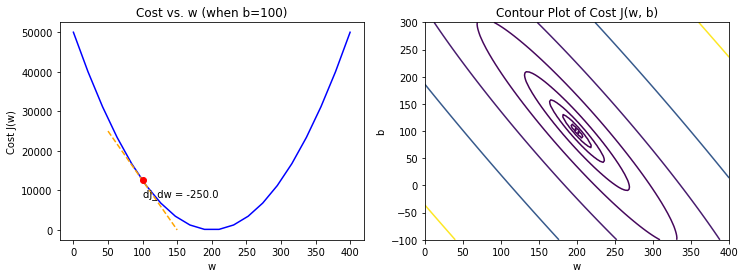

In [69]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
b_fixed = 100
w_range = np.linspace(0,400,20)
costs = [compute_costJ(x_train, y_train, w_val, b_fixed) for w_val in w_range]
ax1.plot(w_range,costs,color='blue')
ax1.set_title("Cost vs. w (when b=100)")
ax1.set_xlabel("w")
ax1.set_ylabel("Cost J(w)")

# 특정 w 지점에서, 기울기 계산 및 접선
for w_val in [100,200,300]:
    cost = compute_costJ(x_train, y_train, w_val, b_fixed)
    dj_dw, dj_db = compute_gradient(x_train, y_train, w_val, b_fixed)

    ax1.scatter(w_val,cost,color='red',zorder=10)
    ax1.text(w_val,cost-4000,f"dj_dw = {dj_dw:.1f}")

    tangent_x = np.array([w_val-50,w_val+50])
    tangent_y = dj_dw * (tangent_x - w_val) + cost
    ax1.plot(tangent_x, tangent_y, color='orange', linestyle='--', label=f'Tangent at w={w_val}')
    
    w_range_2d = np.linspace(0, 400, 100)
    b_range_2d = np.linspace(-100,300,100)
    W,B = np.meshgrid(w_range_2d,b_range_2d)
    costs_2d = np.zeros(W.shape)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            costs_2d[i,j] = compute_costJ(x_train, y_train, W[i,j], B[i,j])

    ax2.contour(W,B,costs_2d,levels=np.logspace(0,5,10),cmap='viridis')
    ax2.set_title("Contour Plot of Cost J(w, b)")
    ax2.set_xlabel("w")
    ax2.set_ylabel("b")

    plt.show()